Import needed libraries

In [1]:
%matplotlib inline

import pandas
import numpy
import matplotlib.pyplot as plt

We import the campaign donation data. The data can be found [here](ftp://ftp.fec.gov/FEC/Presidential_Map/2012/P00000001/P00000001-ALL.zip). The dictionary of this data set is [here](ftp://ftp.fec.gov/FEC/Presidential_Map/2012/DATA_DICTIONARIES/CONTRIBUTOR_FORMAT.txt)

In [40]:
donations_data_types = {'cmte_id':numpy.str, 'cand_id':numpy.str, 'cand_nm':numpy.str, 
                        'contbr_nm':numpy.str, 'contbr_city':numpy.str, 'contbr_st':numpy.str, 
                        'contbr_zip':numpy.str, 'contbr_employer':numpy.str, 'contbr_occupation':numpy.str,
                        'contb_receipt_amt':numpy.float, 'contb_receipt_dt':numpy.str, 'receipt_desc':numpy.str, 
                        'memo_cd':numpy.str, 'memo_text':numpy.str, 'form_tp':numpy.str,
                        'file_num':numpy.int, 'tran_id':numpy.str, 'election_tp':numpy.str}
date_parser = lambda x: pandas.to_datetime(x, infer_datetime_format = True)
donations = pandas.read_csv("donations/P00000001-ALL.csv", dtype = donations_data_types, index_col = False, date_parser = date_parser, parse_dates = ['contb_receipt_dt'])

parties = {
    'Bachmann, Michele': 'Republican',
    'Romney, Mitt': 'Republican',
    'Obama, Barack': 'Democrat',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'Paul, Ron': 'Republican', 
    'Santorum, Rick': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican', 
    'McCotter, Thaddeus G': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Perry, Rick': 'Republican',
    'Stein, Jill': 'Republican'
}

donations['party'] = donations.cand_nm.map(parties)

The election_tp column indicates the election for which the contribution was made. The posible values are:

In [41]:
donations.election_tp.unique()

array(['P2012', 'G2012', nan, 'P2008', 'G2008', 'O2012', 'P2102', 'P2014',
       'P', 'P2011'], dtype=object)

We observer that there are entries refering to the campaigns of 2008, as well as entries that seem like typos. We will investigate each one.

First the 'P2008' and 'G2008' values. There are 767 entries that refer to the 2008 primaries and general elections.

In [42]:
donations[donations.election_tp.isin(['P2008', 'G2008'])]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
1594231,C00431445,P80003338,"Obama, Barack","MOUSAVIZADEH, NADER",LONDON W11 2-BY,AA,NaN,NaN,NaN,-200.00,2012-12-31,Refund,NaN,NaN,SB28A,853328,D126327,P2008,Democrat
1594232,C00431445,P80003338,"Obama, Barack","MOUSAVIZADEH, NADER",LONDON W11 2-BY,AA,NaN,NaN,NaN,-2300.00,2012-12-31,Refund,NaN,NaN,SB28A,853328,D126328,G2008,Democrat
1594233,C00431445,P80003338,"Obama, Barack","MOUSAVIZADEH, NADER",LONDON W11 2-BY,AA,NaN,NaN,NaN,-200.00,2012-12-31,Refund,X,DISGORGED TO US TREASURY,SB28A,853328,D126329,P2008,Democrat
1594234,C00431445,P80003338,"Obama, Barack","MOUSAVIZADEH, NADER",LONDON W11 2-BY,AA,NaN,NaN,NaN,-2300.00,2012-12-31,Refund,X,DISGORGED TO US TREASURY,SB28A,853328,D126330,G2008,Democrat
1594495,C00431445,P80003338,"Obama, Barack","HILL, HARRY A",AICHI-GUN,AA,NaN,NaN,NaN,-2300.00,2011-06-30,Refund,NaN,NaN,SB28A,756214,D26361,G2008,Democrat
1594496,C00431445,P80003338,"Obama, Barack","SMITH, HOLLY L",LONDON SW5 0JP,AA,NaN,NaN,NaN,-2300.00,2011-06-29,Refund,NaN,NaN,SB28A,756214,D26182,P2008,Democrat
1594497,C00431445,P80003338,"Obama, Barack","WINFIELD, MARTHA BERKMAN",LONDON W2 5DH,AA,NaN,NaN,NaN,-2300.00,2011-06-30,Refund,NaN,NaN,SB28A,756214,D26192,P2008,Democrat
1606114,C00431445,P80003338,"Obama, Barack","GELLERT, HUGH",ANCHORAGE,AK,995163302,NaN,NaN,-1300.00,2011-06-27,Refund,NaN,NaN,SB28A,756214,D26092,P2008,Democrat
1610615,C00431445,P80003338,"Obama, Barack","BOLTON, LAURA",FLORENCE,AL,356303954,NaN,NaN,-390.00,2011-09-02,Refund,NaN,CONTRIB FROM 08/5/08,SB28A,756218,D27048,P2008,Democrat
1621087,C00431445,P80003338,"Obama, Barack","ESKILDSEN, SAM",BIRMINGHAM,AL,352224134,NaN,NaN,-125.00,2012-12-31,Refund,NaN,NaN,SB28A,853328,D126333,P2008,Democrat


We observer that they concern Ron Paul and Barack Obama. Ron Paul was indeed candidate for the Republicans in 2008 primaries so we can assume that this entries are mistakenly inserted in the data set. This is also supported by the date of the entries which is in 2008 and 2007 As for Barack Obama we observe that this entries are refunds for his 2008 campaigns.

In [43]:
donations.cand_nm[donations.election_tp.isin(['P2008', 'G2008'])].unique()

array(['Obama, Barack', 'Paul, Ron'], dtype=object)

We proceed to remove those entries.

In [44]:
donations = donations[donations.election_tp != 'P2008']
donations = donations[donations.election_tp != 'G2008']

We sort the entries based on the contb_receipt_dt which is the date on the receipt of the donation. We print the first and last entry to get the date range.

In [45]:
sorted_donations = donations.sort_values('contb_receipt_dt')
sorted_donations.head(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
5952298,C00496067,P00003608,"Cain, Herman","MAREK, JOHN",WAUKESHA,WI,531899772,INFORMATION REQUESTED,INFORMATION REQUESTED,2400,2011-01-01,NaN,NaN,NaN,SA17A,755790,A08C59AEB555442918AE,P2012,Republican


In [46]:
sorted_donations.tail(1)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party
288054,C00431171,P80003353,"Romney, Mitt","MARTIN, JULIE ANN",LITTLETON,CO,80123,NaN,NaN,-200,2012-12-31,Refund,NaN,NaN,SB28A,934756,SB28.YE.2079,G2012,Republican


We observe that contb_receipt_dt ranges from 1-1-2011 to 31-12-2012.

We need to retrieve the DJIA index for these dates.

Get DJIA data from https://research.stlouisfed.org/fred2/series/DJIA/downloaddata.

We download both the index and the percentage files and combine them. We are interested in the timeframe starting from 1-1-2011 to 31-12-2012.

In [9]:
djia_index_names = ['Date', 'Index']
djia_index_dtypes = {'Date':numpy.str, 'Index':numpy.float}
djia_index = pandas.read_csv("djia/index.csv", index_col = False, header = 0, names = djia_index_names, dtype = djia_index_dtypes, parse_dates = ['Date'], na_values = '.')

djia_percentage_names = ['Date', 'Percentage']
djia_percentage_dtypes = {'Date':numpy.str, 'Percentage':numpy.float}
djia_percentage = pandas.read_csv("djia/percentage.csv", index_col = False, header = 0, names = djia_percentage_names, dtype = djia_percentage_dtypes, parse_dates = ['Date'], na_values = '.')

djia = pandas.merge(djia_index, djia_percentage, on='Date')

In [50]:
daily_donations = donations[['contb_receipt_dt', 'contb_receipt_amt', 'cand_nm', 'party']][donations.contb_receipt_amt > 0].groupby(['contb_receipt_dt', 'party'], as_index=False)
#len(daily_donations)

     contb_receipt_dt       party  contb_receipt_amt
0          2011-01-01  Republican            8600.00
1          2011-01-03  Republican            4800.00
2          2011-01-04  Republican            5000.00
3          2011-01-12  Republican            4150.00
4          2011-01-13  Republican            4000.00
5          2011-01-14  Republican            6000.00
6          2011-01-15  Republican             500.00
7          2011-01-16  Republican             750.00
8          2011-01-17  Republican             500.00
9          2011-01-18  Republican            4800.00
10         2011-01-20  Republican            2650.00
11         2011-01-21  Republican             250.00
12         2011-01-22  Republican             250.00
13         2011-01-24  Republican            2400.00
14         2011-01-26  Republican            5400.00
15         2011-01-27  Republican            2650.00
16         2011-01-28  Republican             650.00
17         2011-01-29  Republican             

,contb_receipt_amt,Index,Percentage
contb_receipt_amt,1.000000,0.411464,-0.040913
Index,0.411464,1.000000,0.085985
Percentage,-0.040913,0.085985,1.000000


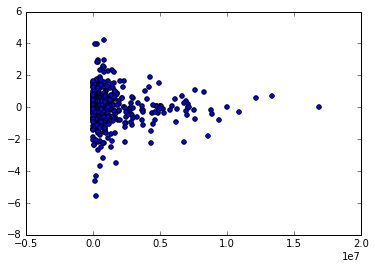

In [54]:
sum_daily_donations = daily_donations.sum()
print(sum_daily_donations)
sums = pandas.merge(sum_daily_donations[sum_daily_donations.party == 'Republican'], djia, how='left', left_on='contb_receipt_dt', right_on='Date')
plt.scatter(sums.contb_receipt_amt, sums.Percentage)
sums.corr()

In [ ]:
p1_col_names = ['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO', 'P0010001']
p1 = pandas.read_csv('sf1/us000012010.sf1', index_col = False, header = None, names = p1_col_names)

In [ ]:
sf1geo_column_widths = [6, 2, 3, 2, 3, 2, 7, 1, 1, 2, 3, 2, 2, 5, 2, 2, 5, 2, 2, 6, 1, 4, 2, 5, 2, 2, 4, 5, 2, 1, 3, 5, 2, 6, 1, 5, 2, 5, 2, 5, 3, 5, 2, 5, 3, 1, 1, 5, 2, 1, 1, 2, 3, 3, 6, 1, 3, 5, 5, 2, 5, 5, 5, 14, 14, 90, 1, 1, 9, 9, 11, 12, 2, 1, 6, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 5, 18]
sf1geo = pandas.read_fwf('sf1/usgeo2010.sf1', index_col = False, header = None, widths = sf1geo_column_widths)

In [37]:
donations.dtypes
print(donations.sort_values('contb_receipt_dt',ascending=True)[1:20])

           cmte_id    cand_id       cand_nm                contbr_nm  \
5811691  C00495820  P80000748     Paul, Ron  ROBINSON, VERNON L. MR.   
5849004  C00495820  P80000748     Paul, Ron      MABRY, BRIAN E MRS.   
5838450  C00495820  P80000748     Paul, Ron          LYDEN, CARA MR.   
5814866  C00495820  P80000748     Paul, Ron        EAN, GARRET C MR.   
5811874  C00495820  P80000748     Paul, Ron           CLARY, JUNE L.   
5872591  C00495820  P80000748     Paul, Ron           CLARK, RICHARD   
5785949  C00495820  P80000748     Paul, Ron    MARTINDALE, SANDRA A.   
5793157  C00495820  P80000748     Paul, Ron          STACEY, ROBERTA   
5754624  C00495820  P80000748     Paul, Ron         LINK, KIMBERLY E   
5948986  C00496067  P00003608  Cain, Herman           TRIBBLE, JAMES   
5948985  C00496067  P00003608  Cain, Herman       STOLTENBERG, WAYNE   
5952298  C00496067  P00003608  Cain, Herman              MAREK, JOHN   
5948987  C00496067  P00003608  Cain, Herman      DAVIS, JEREMY S

Next the NaN entries. All of them seem to be valid entries